# Review Ratings Challenge

**Task:** Import review_ratings_headers.txt file

In [2]:
import pandas as pd
review_ratings_headers = pd.read_csv("review_ratings_headers.txt", sep=":", header = None)
review_ratings_headers.columns = ['Attribute','Meaning']
review_ratings_headers

,Attribute,Meaning
0,Attribute 1,Unique user id
1,Attribute 2,Average ratings on churches
2,Attribute 3,Average ratings on resorts
3,Attribute 4,Average ratings on beaches
4,Attribute 5,Average ratings on parks
5,Attribute 6,Average ratings on theatres
6,Attribute 7,Average ratings on museums
7,Attribute 8,Average ratings on malls
8,Attribute 9,Average ratings on zoo
9,Attribute 10,Average ratings on restaurants


**Task:**
1. Extract "user" and "id" from the first line and combine with an underscore.
1. In each line after the first line, extract the word(s) after "on" in each line, removing special characters (e.g. /n, &, etc.). 
1. If there is more than one word, combine the words with a single underscore. 
1. Put the words into a list to use as headers for your dataset later.

1. Extract "user" and "id" from the first line and combine with an underscore.

In [2]:
import re
review_ratings_headers['Meaning'][0] = '_'.join(re.findall(r'\buser|id\b', (review_ratings_headers['Meaning'][0])))

In [3]:
review_ratings_headers['Meaning'][0]

'user_id'

2. In each line after the first line, extract the word(s) after "on" in each line, removing special characters (e.g. /n, &, etc.). 
3. If there is more than one word, combine the words with a single underscore. 
4. Put the words into a list to use as headers for your dataset later.

In [4]:
count = 0
underscoreCount = 0
columnList=[]
for x in range(1,len(review_ratings_headers['Meaning'][1:])+1):
    #print(x)
    temp1 = (re.findall(r'on\s.+', (review_ratings_headers['Meaning'][x])))[0]
    columnList.append('_'.join(re.findall(r'[a-zA-Z0-9]+', temp1)[1:]))
    review_ratings_headers['Meaning'][x] = '_'.join(re.findall(r'[a-zA-Z0-9]+', temp1)[1:])
    if len(re.findall(r'[a-zA-Z0-9]+', temp1)[1:])>1:
        count +=1
    underscoreCount += len(re.findall(r'[a-zA-Z0-9]+', temp1)[1:])-1

In [5]:
columnList

['churches',
 'resorts',
 'beaches',
 'parks',
 'theatres',
 'museums',
 'malls',
 'zoo',
 'restaurants',
 'pubs_bars',
 'local_services',
 'burger_pizza_shops',
 'hotels_other_lodgings',
 'juice_bars',
 'art_galleries',
 'dance_clubs',
 'swimming_pools',
 'gyms',
 'bakeries',
 'beauty_spas',
 'cafes',
 'view_points',
 'monuments',
 'gardens']

In [6]:
count, underscoreCount

(10, 12)

Question 1: How many headers are there with 2 or more words combined by an underscore?

In [7]:
10

10

Question 2: How many underscores are there in all of the headers?

In [8]:
12

12

**Task:** Read in review_ratings.csv, set names as the cleaned headers list from above, skip the first row, and do not include an index column

In [9]:
reviewRatings = pd.read_csv('review_ratings.csv')
reviewRatings.set_index('User', drop=True, inplace=True)
reviewRatings.drop(['Unnamed: 25'], axis = 1, inplace=True)
reviewRatings.columns = columnList
reviewRatings.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
User,,,,,,,,,,,,,,,,,,,,,
User 777,1.90,1.93,1.95,5.00,2.02,2.00,2.01,2.00,2.01,2.11,...,1.99,1.62,1.41,1.40,1.41,1.44,0.58,0.99,1.89,1.89
User 5278,1.37,1.59,1.42,1.81,1.80,1.79,1.81,2.65,2.63,2.63,...,5.00,5.00,0.52,0.50,0.51,0.63,1.43,1.51,1.36,1.35
User 2374,0.75,0.79,2.03,2.88,5.00,5.00,1.64,1.59,1.56,1.55,...,0.78,0.77,0.78,0.79,1.10,0.73,0.70,0.70,0.70,0.73
User 943,1.22,5.00,1.28,5.00,5.00,2.83,2.58,1.72,5.00,4.94,...,0.96,1.16,0.58,0.58,0.59,0.71,1.27,5.00,1.26,1.21
User 4082,1.12,1.15,5.00,3.27,5.00,5.00,5.00,1.99,1.79,2.58,...,1.76,1.78,0.51,0.00,0.00,0.00,0.50,1.09,1.08,1.09


In [10]:
reviewRatings.shape

(4456, 24)

Question 3: How many rows are in the ratings dataset?

In [11]:
4456

4456

**Task:** Import review_ratings_with_headers.csv

In [12]:
review_ratings_with_headers = pd.read_csv('review_ratings_with_headers.csv')
review_ratings_with_headers.head()

,user_id,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,User 777,1.90,1.93,1.95,5.00,2.02,2.00,2.01,2.00,2.01,...,1.99,1.62,1.41,1.40,1.41,1.44,0.58,0.99,1.89,1.89
1,User 5278,1.37,1.59,1.42,1.81,1.80,1.79,1.81,2.65,2.63,...,5.00,5.00,0.52,0.50,0.51,0.63,1.43,1.51,1.36,1.35
2,User 2374,0.75,0.79,2.03,2.88,5.00,5.00,1.64,1.59,1.56,...,0.78,0.77,0.78,0.79,1.10,0.73,0.70,0.70,0.70,0.73
3,User 943,1.22,5.00,1.28,5.00,5.00,2.83,2.58,1.72,5.00,...,0.96,1.16,0.58,0.58,0.59,0.71,1.27,5.00,1.26,1.21
4,User 4082,1.12,1.15,5.00,3.27,5.00,5.00,5.00,1.99,1.79,...,1.76,1.78,0.51,0.00,0.00,0.00,0.50,1.09,1.08,1.09


**Task:** Explore data types in the dataset

In [13]:
review_ratings_with_headers.dtypes

user_id                   object
churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoo                      float64
restaurants              float64
pubs_bars                float64
local_services            object
burger_pizza_shops       float64
hotels_other_lodgings    float64
juice_bars               float64
art_galleries            float64
dance_clubs              float64
swimming_pools           float64
gyms                     float64
bakeries                 float64
beauty_spas              float64
cafes                    float64
view_points              float64
monuments                float64
gardens                  float64
dtype: object

Question 4: What data type is user_id?

In [14]:
object

object

**Task:** Find special characters that are in one of the columns, replace with 0, and convert to continuous/float type

In [15]:
for x in review_ratings_with_headers['local_services']:
    try:
        float(x)
    except:
        print("String that contained the special characters:",x)
        
review_ratings_with_headers['local_services'] = pd.to_numeric(review_ratings_with_headers['local_services'], errors='coerce')
review_ratings_with_headers[['local_services']] = review_ratings_with_headers[['local_services']].fillna(value=0.0)


String that contained the special characters: 2	2.


In [16]:
review_ratings_with_headers.dtypes

user_id                   object
churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoo                      float64
restaurants              float64
pubs_bars                float64
local_services           float64
burger_pizza_shops       float64
hotels_other_lodgings    float64
juice_bars               float64
art_galleries            float64
dance_clubs              float64
swimming_pools           float64
gyms                     float64
bakeries                 float64
beauty_spas              float64
cafes                    float64
view_points              float64
monuments                float64
gardens                  float64
dtype: object

In [17]:
review_ratings_with_headers['local_services'][2697]

0.0

Question 5: What was the string that contained the special characters?

In [23]:
print('2\t2.')
'2\t2.'

2	2.


'2\t2.'

Question 6: What is the mean of the variable now that it has been converted to type continuous/float?

In [19]:
print("Mean of the Variable(local_services):", review_ratings_with_headers['local_services'].mean())

Mean of the Variable(local_services): 2.5450134649910234


**Task:** Fill missing values with 0 and run summary statistics on the dataset

In [20]:
#Filling missing values with 0
review_ratings_with_headers.fillna(value = 0.0, inplace=True)
#Summary Statistics of dataset
print("Median of the Variables:\n",review_ratings_with_headers.median())
print("\n")
print("Summary Statistics\n")
review_ratings_with_headers.describe()

Median of the Variables:
 churches                 1.340
resorts                  1.880
beaches                  2.065
parks                    2.450
theatres                 2.670
museums                  2.700
malls                    3.230
zoo                      2.170
restaurants              2.800
pubs_bars                2.680
local_services           2.000
burger_pizza_shops       1.690
hotels_other_lodgings    1.620
juice_bars               1.500
art_galleries            1.330
dance_clubs              0.800
swimming_pools           0.740
gyms                     0.690
bakeries                 0.690
beauty_spas              0.690
cafes                    0.770
view_points              1.020
monuments                1.070
gardens                  1.290
dtype: float64


Summary Statistics



,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
count,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,...,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000
mean,1.452987,2.304504,2.483409,2.790247,2.966690,2.908746,3.378438,2.542897,3.125222,2.832208,...,2.224661,1.189217,0.950121,0.828218,0.966405,0.994675,0.962089,1.734473,1.523761,1.549632
std,0.829420,1.418781,1.246003,1.304826,1.339469,1.288723,1.414961,1.116005,1.357130,1.306910,...,1.727771,1.109464,0.984810,0.963599,1.198750,1.183759,0.919017,1.585888,1.313043,1.165424
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.110000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.530000,1.737500,1.780000,1.790000,1.940000,1.620000,1.800000,1.630000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.880000,2.065000,2.450000,2.670000,2.700000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.770000,1.020000,1.070000,1.290000
75%,1.810000,2.670000,2.740000,4.062500,4.330000,3.910000,5.000000,3.192500,5.000000,3.492500,...,4.900000,1.150000,0.910000,0.840000,0.860000,0.860000,1.000000,2.060000,1.540000,1.650000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Question 7: What is the IQR of ratings for malls?

In [21]:
IQR = (review_ratings_with_headers.quantile(0.75)-review_ratings_with_headers.quantile(0.25))
IQR

churches                 0.8900
resorts                  1.3100
beaches                  1.2100
parks                    2.3250
theatres                 2.5500
museums                  2.1200
malls                    3.0600
zoo                      1.5725
restaurants              3.2000
pubs_bars                1.8625
local_services           1.5900
burger_pizza_shops       1.0000
hotels_other_lodgings    1.1825
juice_bars               1.8000
art_galleries            4.0400
dance_clubs              0.4600
swimming_pools           0.3300
gyms                     0.3100
bakeries                 0.3400
beauty_spas              0.3200
cafes                    0.4300
view_points              1.3200
monuments                0.7500
gardens                  0.7700
dtype: float64

In [22]:
print("IQR of ratings for malls:", review_ratings_with_headers['malls'].quantile(0.75)-review_ratings_with_headers['malls'].quantile(0.25))

IQR of ratings for malls: 3.06


**Task:** Import review_ratings_processed.csv

In [140]:
review_ratings_processed = pd.read_csv('review_ratings_processed.csv')
from matplotlib import pyplot as plt
import seaborn as sns
review_ratings_processed.head()

,user_id,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,User 777,1.90,1.93,1.95,5.00,2.02,2.00,2.01,2.00,2.01,...,1.99,1.62,1.41,1.40,1.41,1.44,0.58,0.99,1.89,1.89
1,User 5278,1.37,1.59,1.42,1.81,1.80,1.79,1.81,2.65,2.63,...,5.00,5.00,0.52,0.50,0.51,0.63,1.43,1.51,1.36,1.35
2,User 2374,0.75,0.79,2.03,2.88,5.00,5.00,1.64,1.59,1.56,...,0.78,0.77,0.78,0.79,1.10,0.73,0.70,0.70,0.70,0.73
3,User 943,1.22,5.00,1.28,5.00,5.00,2.83,2.58,1.72,5.00,...,0.96,1.16,0.58,0.58,0.59,0.71,1.27,5.00,1.26,1.21
4,User 4082,1.12,1.15,5.00,3.27,5.00,5.00,5.00,1.99,1.79,...,1.76,1.78,0.51,0.00,0.00,0.00,0.50,1.09,1.08,1.09


**Task:** Find the variables that are most correlated with each other

In [64]:
corr = review_ratings_processed.corr()
corr

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
churches,1.000000,0.260257,0.156641,0.073435,0.039801,-0.092727,-0.265487,-0.185384,-0.294143,-0.275124,...,-0.137725,0.067658,0.130032,0.161656,0.179255,0.204207,0.309205,0.372235,0.411541,0.486649
resorts,0.260257,1.000000,0.317444,0.166368,0.152136,0.049450,-0.059706,0.006087,-0.062348,-0.097929,...,-0.065658,-0.041750,-0.070500,-0.019084,0.031711,0.092644,0.095150,0.026616,0.093188,0.135329
beaches,0.156641,0.317444,1.000000,0.399979,0.323741,0.153930,-0.074089,-0.180444,-0.223845,-0.175301,...,-0.137319,-0.027532,-0.085583,-0.116461,-0.082800,-0.013352,0.007740,0.148735,0.123528,0.085184
parks,0.073435,0.166368,0.399979,1.000000,0.623595,0.307184,-0.075504,-0.127226,-0.170477,-0.118112,...,-0.276030,0.010401,-0.132519,-0.181254,-0.197990,-0.094858,-0.056405,0.288137,0.175580,0.090223
theatres,0.039801,0.152136,0.323741,0.623595,1.000000,0.481160,0.081622,0.002951,-0.168624,-0.098473,...,-0.330776,-0.067829,-0.192170,-0.241485,-0.259324,-0.197368,-0.135495,0.126214,0.132492,0.099770
museums,-0.092727,0.049450,0.153930,0.307184,0.481160,1.000000,0.390207,0.203442,0.116491,-0.021917,...,-0.185366,-0.156462,-0.233413,-0.269439,-0.267716,-0.228659,-0.191088,-0.082948,-0.083190,-0.063072
malls,-0.265487,-0.059706,-0.074089,-0.075504,0.081622,0.390207,1.000000,0.394529,0.426686,0.250479,...,0.100706,-0.145954,-0.208489,-0.223856,-0.280185,-0.234097,-0.255272,-0.353092,-0.217277,-0.243462
zoo,-0.185384,0.006087,-0.180444,-0.127226,0.002951,0.203442,0.394529,1.000000,0.527385,0.554738,...,-0.061247,-0.120274,-0.205291,-0.236918,-0.277632,-0.249765,-0.274409,-0.250012,-0.160518,-0.133380
restaurants,-0.294143,-0.062348,-0.223845,-0.170477,-0.168624,0.116491,0.426686,0.527385,1.000000,0.564639,...,0.144566,-0.111435,-0.230312,-0.268960,-0.279472,-0.165755,-0.183172,-0.267634,-0.256989,-0.321528
pubs_bars,-0.275124,-0.097929,-0.175301,-0.118112,-0.098473,-0.021917,0.250479,0.554738,0.564639,1.000000,...,0.043559,-0.028163,-0.213184,-0.274719,-0.320691,-0.246146,-0.230700,-0.178047,-0.200229,-0.260093


In [96]:
c = review_ratings_processed.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort",ascending=False)
so[so!=1].head()

theatres     parks          0.623595
parks        theatres       0.623595
pubs_bars    restaurants    0.564639
restaurants  pubs_bars      0.564639
zoo          pubs_bars      0.554738
dtype: float64

### Parks and Theatres are the variables that are most correlated with each other with correlation 0.62

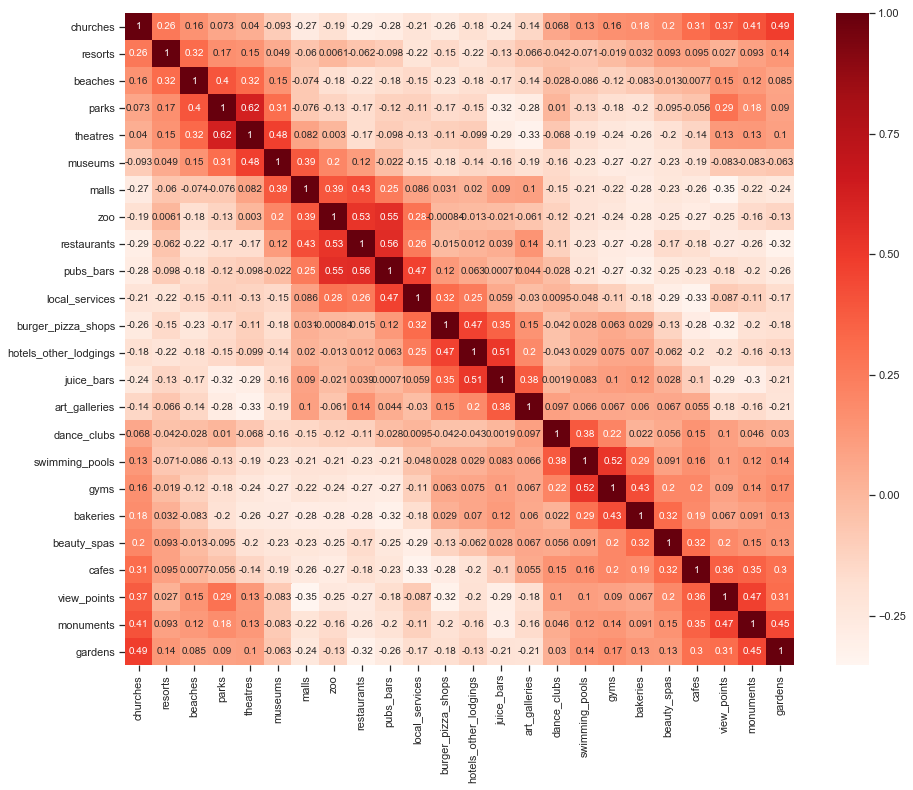

In [52]:
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

From above:
    1. Parks and theatres are very highly correlated with each other(0.62)
    2. Pubs and bars is highly correlated with restaurants(0.56)
    3. Gardens and churches are highly correlated with each other(0.49)
    4. Zoo is highly correlated with pubs and bars(0.55)
    5. Zoo is highly correlated with restaurants(0.53)
    6. Swimming Pools is highly correlated with gym(0.52)
    7. Malls is correlated with Restaurants(0.43)
    8. burger_pizza_shops is correlated with hotels_other_lodgings(0.47)
    9. hotels_other_lodgings is highly correlated with juice_bars(0.51)
    10.dance_clubs and swimming_pools are correlated with each other(0.38)
    11.art_galleries is correlated with juice_bars(0.38)
    12.bakeries is correlated with gyms(0.43)
    13.monuments and view_points are highly correlated(0.47)
    14. cafes is correlated with view_points(0.36)

Question 8: What variables is the most negatively correlated with **restaurants**?

In [107]:
corr['restaurants'].sort_values(kind="quicksort",ascending=True).head()

gardens       -0.321528
churches      -0.294143
bakeries      -0.279472
gyms          -0.268960
view_points   -0.267634
Name: restaurants, dtype: float64

In [111]:
corr['restaurants'].idxmin(), min(corr['restaurants'])

('gardens', -0.3215280999609668)

In [55]:
print("Most negatively correlated with restaurants : gardens(-0.321528)")

Most negatively correlated with restaurants : gardens(-0.321528)


**Task:** Group each variable into 10 equal-width bins and calculate the **mean malls** rating for each bin

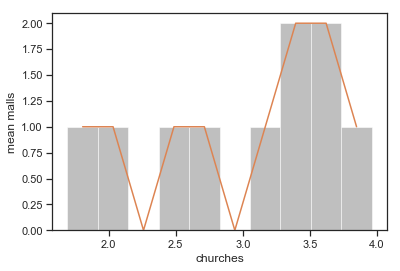

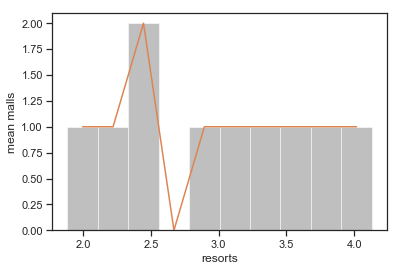

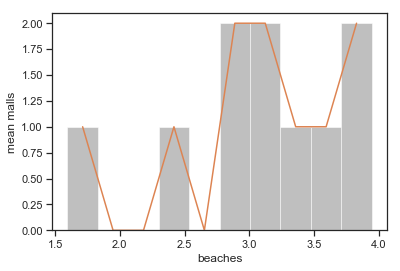

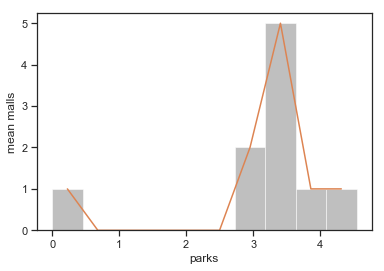

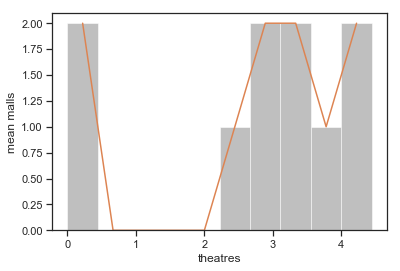

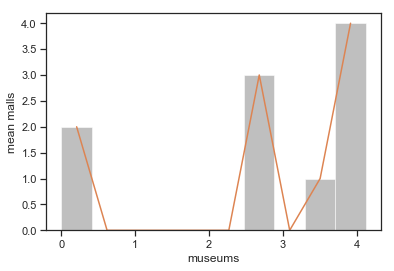

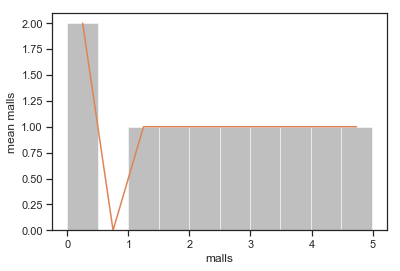

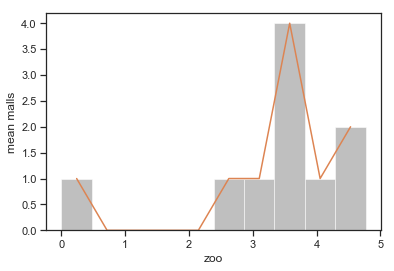

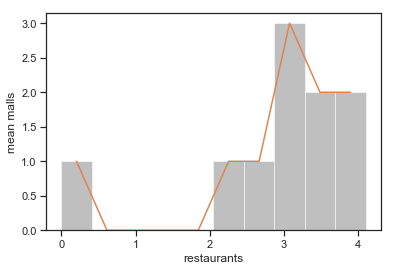

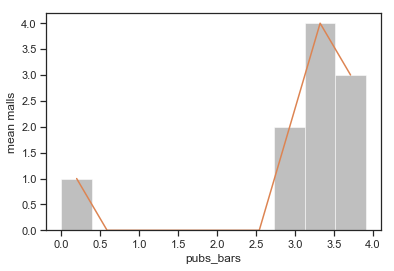

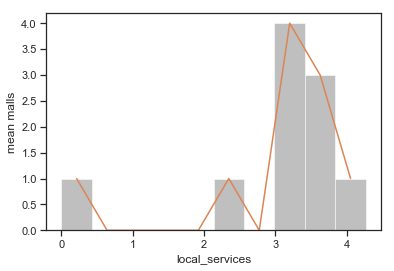

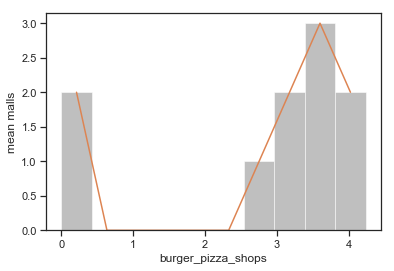

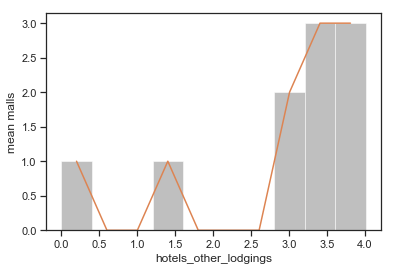

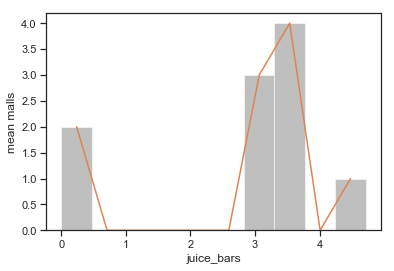

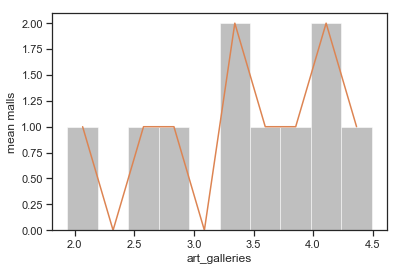

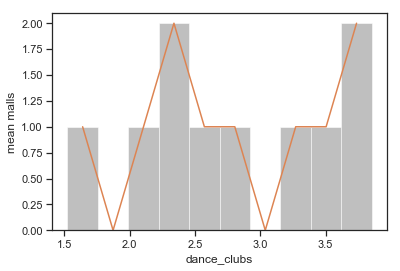

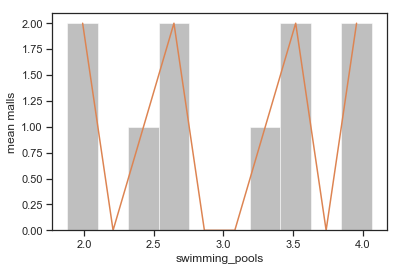

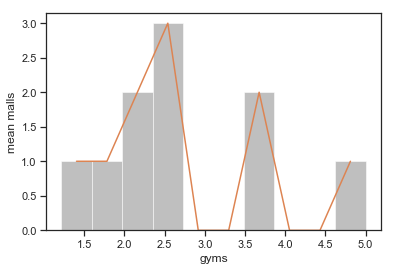

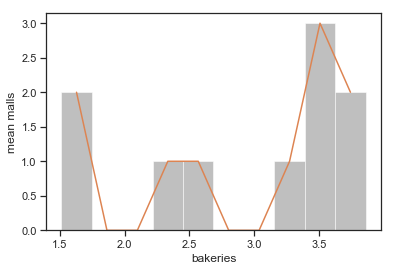

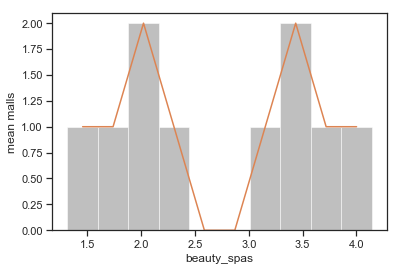

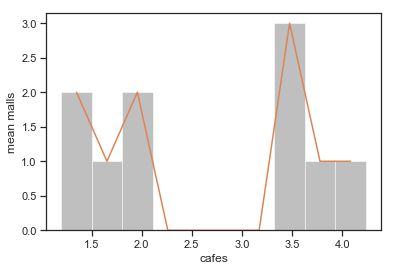

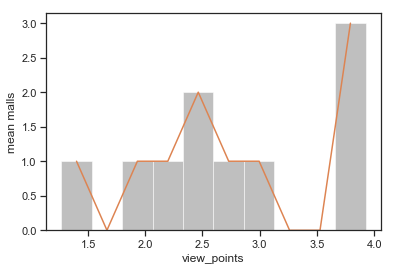

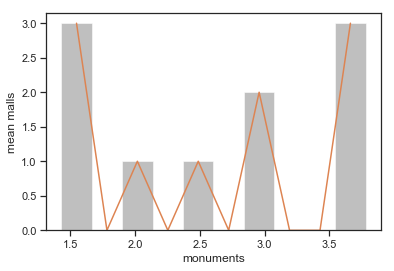

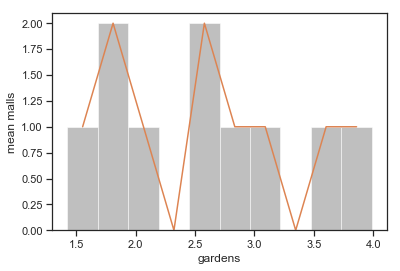

In [194]:
for x in review_ratings_processed:
    if x == 'user_id':
        continue
    bins = pd.cut(review_ratings_processed[x], [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
    y = review_ratings_processed.groupby(bins)['malls'].agg(['mean'])
    y.reset_index(inplace=True)
    y['mean'].fillna(0, inplace=True)
    n, bins, patches = plt.hist(y['mean'], 10, facecolor='grey', alpha=0.5)
    bin_centers = 0.5*(bins[1:]+bins[:-1])
    plt.plot(bin_centers,n) 
    plt.xlabel(x)
    plt.ylabel('mean malls')
    plt.show()

churches


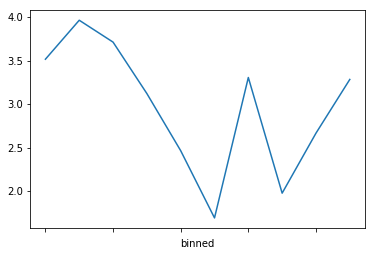

resorts


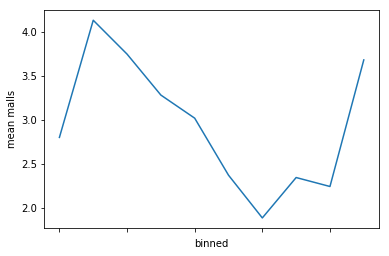

beaches


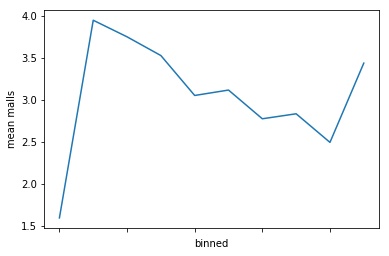

parks


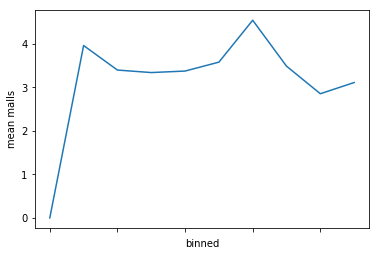

theatres


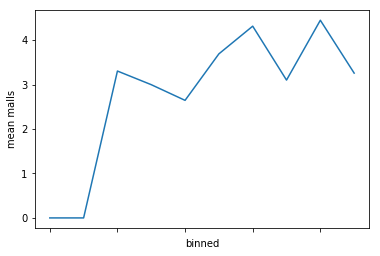

museums


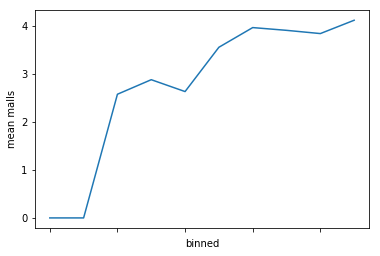

malls


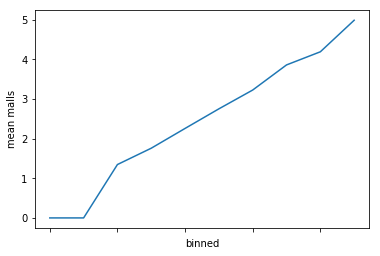

zoo


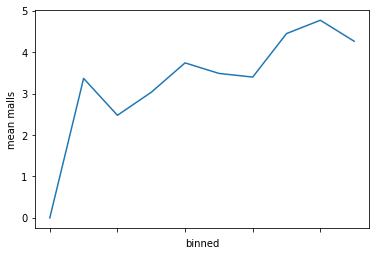

restaurants


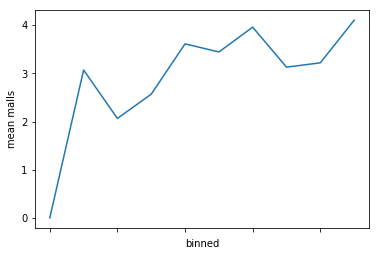

pubs_bars


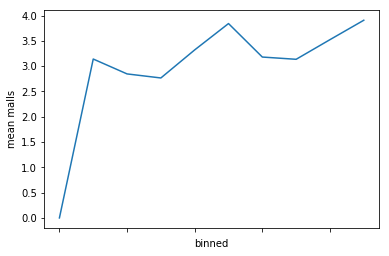

local_services


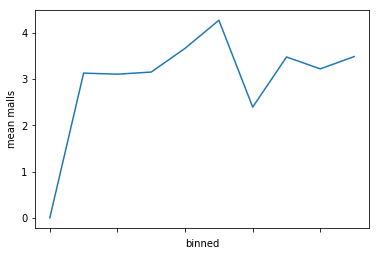

burger_pizza_shops


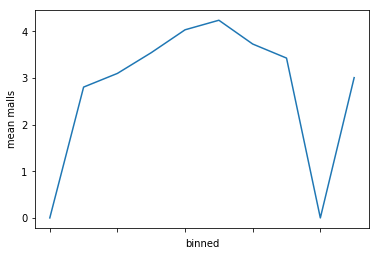

hotels_other_lodgings


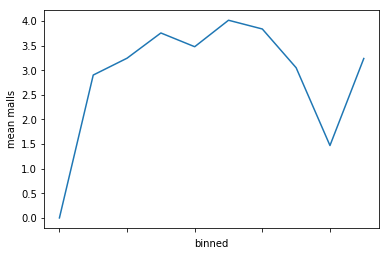

juice_bars


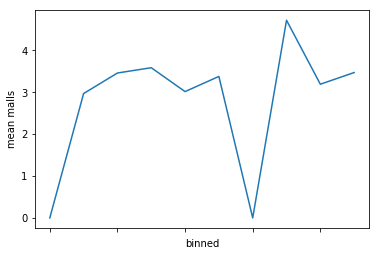

art_galleries


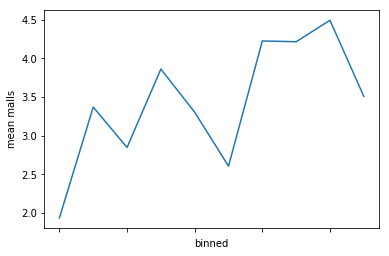

dance_clubs


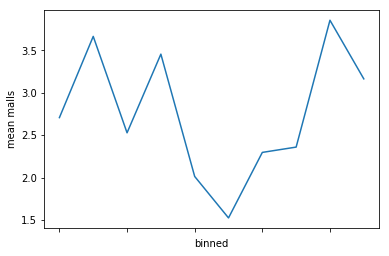

swimming_pools


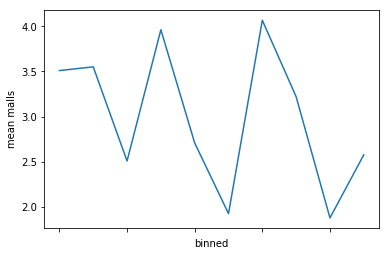

gyms


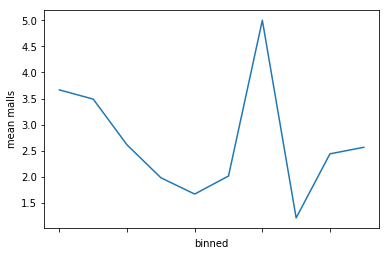

bakeries


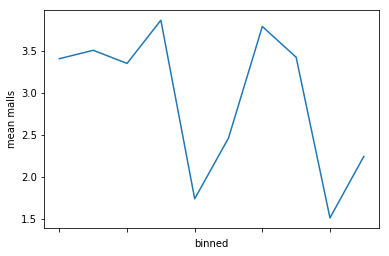

beauty_spas


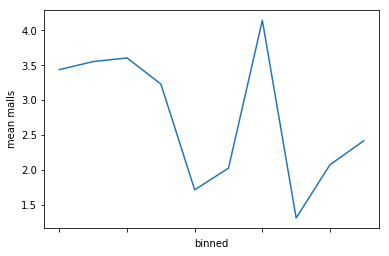

cafes


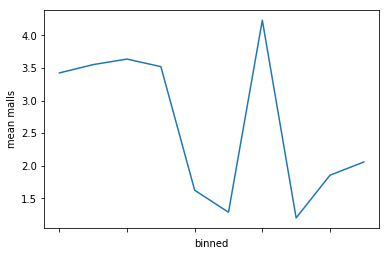

view_points


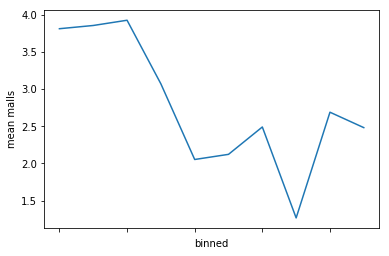

monuments


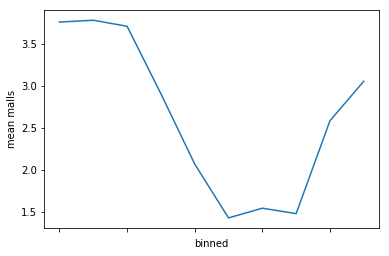

gardens


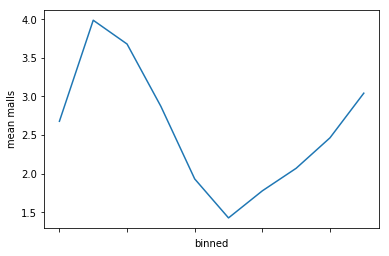

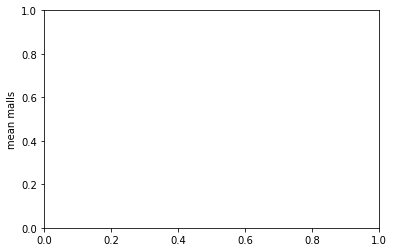

In [9]:
for x in review_ratings_processed:
    if x == 'user_id':
        continue
    bins =  [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
    review_ratings_processed['binned'] = pd.cut(review_ratings_processed[x], bins)
    meanMall = review_ratings_processed.groupby(review_ratings_processed['binned'])['malls'].mean()
    meanMall.fillna(0, inplace=True)
    print(x)
    ax = meanMall.plot()
    plt.show()
    plt.ylabel('mean malls')

In [13]:
review_ratings_processed['binned'] = pd.cut(review_ratings_processed['theatres'], bins)
meanMall = review_ratings_processed.groupby(review_ratings_processed['binned'])['malls'].mean()
meanMall

binned
(0.0, 0.5]         NaN
(0.5, 1.0]         NaN
(1.0, 1.5]    3.304061
(1.5, 2.0]    2.997364
(2.0, 2.5]    2.644745
(2.5, 3.0]    3.690551
(3.0, 3.5]    4.313585
(3.5, 4.0]    3.100441
(4.0, 4.5]    4.446878
(4.5, 5.0]    3.257519
Name: malls, dtype: float64

theatres


Text(0,0.5,'mean malls')

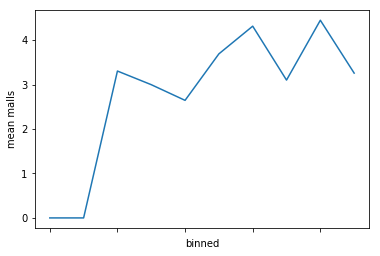

In [59]:
bins =  [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
review_ratings_processed['binned'] = pd.cut(review_ratings_processed['theatres'], bins)
meanMall = review_ratings_processed.groupby(review_ratings_processed['binned'])['malls'].mean()
meanMall.fillna(0, inplace=True)
print('theatres')
ax = meanMall.plot()
#plt.show()
plt.ylabel('mean malls')

Question 9: The chart on quanthub.com shows mean **mall** ratings by which variable?

The chart on qunthub shows mean mall ratings by **"theatres"**, have selected art_galleries on quanthub.com by mistake, which is wrong.

**Task:** Split the dataset into features that include all variables except **juice_bars** and user_id

In [31]:
review_ratings_processed = review_ratings_processed.drop(columns=['binned'])
X = review_ratings_processed.drop(columns=['user_id','juice_bars'])
X.head()
y = review_ratings_processed['juice_bars']

**Task:** Set your seed to 42 and split the data into **80%** training and **20%** test sets 

In [32]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Task:** Set seed to 42 and fit a Random Forest with **10 trees/estimators** to the training set

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
parameters = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]}
regr = RandomForestRegressor(random_state=42, n_estimators=10)
clf = GridSearchCV(regr, parameters, cv = 3, verbose=2, n_jobs = -1)

In [52]:
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
trainr2 = r2_score(y_train, y_pred_train)
y_pred = clf.predict(X_test)
testr2 = r2_score(y_test, y_pred)
trainr2, testr2

Fitting 3 folds for each of 396 candidates, totalling 1188 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1188 out of 1188 | elapsed:  2.4min finished


(0.9751591060647208, 0.7470726172493811)

In [56]:
clf.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [54]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = regr, param_distributions = parameters, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
y_pred_train = rf_random.predict(X_train)
trainr2 = r2_score(y_train, y_pred_train)
y_pred = rf_random.predict(X_test)
testr2 = r2_score(y_test, y_pred)
trainr2, testr2

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   17.3s finished


(0.9751591060647208, 0.7470726172493811)

In [55]:
rf_random.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [133]:
regr = RandomForestRegressor(random_state=42, n_estimators=10)
regr.fit(X_train, y_train)
y_pred_train = regr.predict(X_train)
trainr2 = r2_score(y_train, y_pred_train)
y_pred = regr.predict(X_test)
testr2 = r2_score(y_test, y_pred)
trainr2, testr2

(0.9555679758633068, 0.7336734749500864)

Question 10: What R-Squared value did the model achieve on the test set?

R-squared value of the model on the test set: **0.7470726172493811**

**Task:** Predict **juice_bars** ratings for the full dataset (training and test combined) and append predictions to the table

In [65]:
fullPred = rf_random.predict(X)
r2_score(fullPred, y)
review_ratings_processed['juice_bars_pred'] = fullPred

In [66]:
review_ratings_processed.head()

,user_id,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,juice_bars_pred
0,User 777,1.90,1.93,1.95,5.00,2.02,2.00,2.01,2.00,2.01,...,1.62,1.41,1.40,1.41,1.44,0.58,0.99,1.89,1.89,1.817970
1,User 5278,1.37,1.59,1.42,1.81,1.80,1.79,1.81,2.65,2.63,...,5.00,0.52,0.50,0.51,0.63,1.43,1.51,1.36,1.35,2.932500
2,User 2374,0.75,0.79,2.03,2.88,5.00,5.00,1.64,1.59,1.56,...,0.77,0.78,0.79,1.10,0.73,0.70,0.70,0.70,0.73,4.848250
3,User 943,1.22,5.00,1.28,5.00,5.00,2.83,2.58,1.72,5.00,...,1.16,0.58,0.58,0.59,0.71,1.27,5.00,1.26,1.21,0.925950
4,User 4082,1.12,1.15,5.00,3.27,5.00,5.00,5.00,1.99,1.79,...,1.78,0.51,0.00,0.00,0.00,0.50,1.09,1.08,1.09,1.706457


**Task:** Compute the squared residual for each user id, append to table and sort descending by squared residual 

In [68]:
review_ratings_processed['SR'] = (review_ratings_processed['juice_bars']-review_ratings_processed['juice_bars_pred'])**2

Question 11: How many users had a squared-residual **over 5.0**?

In [69]:
review_ratings_processed[review_ratings_processed['SR']>5.0]

,user_id,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,juice_bars_pred,SR
203,User 1516,1.36,1.39,1.41,2.54,3.17,3.18,5.00,5.00,5.00,...,0.52,0.52,0.53,0.57,0.84,1.47,1.37,1.36,1.509667,12.182427
322,User 4448,2.08,5.00,2.07,2.03,2.04,2.06,2.09,1.65,1.63,...,1.39,2.74,2.17,0.80,1.54,2.08,2.08,2.10,2.599250,5.763601
676,User 5356,2.08,2.28,1.68,1.27,1.24,1.23,1.24,1.41,1.64,...,2.48,0.93,2.48,5.00,2.50,5.00,2.46,2.45,5.000000,15.920100
691,User 3542,1.69,1.69,1.72,1.91,1.90,1.91,5.00,2.01,2.48,...,5.00,5.00,0.00,0.67,1.65,1.63,1.62,1.63,2.647000,5.536609
764,User 1459,0.80,0.82,2.04,2.74,2.93,5.00,5.00,5.00,5.00,...,0.78,0.79,0.81,1.18,0.80,0.76,0.75,0.77,2.016833,8.899283
842,User 568,0.79,0.82,0.86,2.14,3.33,5.00,5.00,5.00,5.00,...,0.68,0.69,0.71,0.73,0.79,0.78,0.77,0.77,1.889167,9.677284
1020,User 2478,0.00,1.41,1.39,1.39,1.42,1.64,2.65,2.64,3.27,...,1.05,1.05,5.00,0.00,0.00,0.00,0.00,0.51,4.689500,14.588580
1025,User 5389,2.60,2.45,2.43,1.33,1.30,1.29,1.28,1.29,1.59,...,0.86,0.88,0.84,5.00,3.70,3.65,2.53,2.50,1.269333,13.917874
1034,User 3456,0.00,1.39,1.37,1.37,1.40,5.00,2.65,2.64,3.27,...,1.07,1.07,5.00,0.00,0.00,0.00,0.00,0.58,3.571917,7.139139
1114,User 618,1.39,1.45,1.44,2.62,2.64,3.26,5.00,5.00,5.00,...,0.00,0.00,0.00,3.27,0.79,1.42,1.39,1.38,2.178583,7.960392


In [70]:
len(review_ratings_processed[review_ratings_processed['SR']>5.0])

41

### **41** users had a squared-residual over 5.0

**Task:** Extract the first tree/estimator from the Random Forest Model

In [121]:
firstEstimator = rf_random.estimator[0]
print('first estimator:', firstEstimator)

first estimator: DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1608637542, splitter='best')


In [116]:
def get_code(tree, feature_names):
        left      = tree.tree_.children_left
        right     = tree.tree_.children_right
        threshold = tree.tree_.threshold
        features  = [feature_names[i] for i in tree.tree_.feature]
        value = tree.tree_.value

        def recurse(left, right, threshold, features, node):
                if (threshold[node] != -2):
                        print("if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
                        if left[node] != -1:
                                recurse (left, right, threshold, features,left[node])
                        print("} else {")
                        if right[node] != -1:
                                recurse (left, right, threshold, features,right[node])
                        print("}")
                else:
                        print("return " + str(value[node]))

        recurse(left, right, threshold, features, 0)

First Estimator Decision Path:

In [117]:
get_code(rf_random.estimator[0], X.columns)

if ( hotels_other_lodgings <= 1.7549999952316284 ) {
if ( theatres <= 1.4049999713897705 ) {
if ( monuments <= 2.6149998903274536 ) {
if ( bakeries <= 1.0750000476837158 ) {
if ( bakeries <= 0.7649999856948853 ) {
if ( swimming_pools <= 0.7800000011920929 ) {
return [[5.]]
} else {
return [[0.9]]
}
} else {
if ( monuments <= 0.5049999952316284 ) {
if ( dance_clubs <= 0.7950000166893005 ) {
if ( view_points <= 0.5149999856948853 ) {
return [[5.]]
} else {
return [[1.7]]
}
} else {
if ( churches <= 0.6149999797344208 ) {
if ( resorts <= 0.5600000023841858 ) {
return [[1.76]]
} else {
return [[1.74]]
}
} else {
return [[5.]]
}
}
} else {
if ( museums <= 4.7799999713897705 ) {
if ( local_services <= 2.774999976158142 ) {
if ( swimming_pools <= 0.7899999916553497 ) {
if ( cafes <= 0.675000011920929 ) {
if ( hotels_other_lodgings <= 1.6450000405311584 ) {
if ( local_services <= 2.5649999380111694 ) {
return [[1.62]]
} else {
if ( museums <= 1.3650000095367432 ) {
return [[1.6]]
} else {
if (

return [[1.53]]
}
} else {
return [[1.53]]
}
}
} else {
if ( zoo <= 4.110000014305115 ) {
if ( burger_pizza_shops <= 1.6950000524520874 ) {
if ( resorts <= 3.9600000381469727 ) {
if ( theatres <= 4.630000114440918 ) {
return [[1.67]]
} else {
return [[1.69]]
}
} else {
return [[1.71]]
}
} else {
if ( pubs_bars <= 4.429999947547913 ) {
return [[1.54]]
} else {
if ( restaurants <= 2.424999952316284 ) {
return [[1.51]]
} else {
return [[1.49]]
}
}
}
} else {
if ( theatres <= 4.615000009536743 ) {
if ( dance_clubs <= 0.9399999976158142 ) {
return [[1.76]]
} else {
return [[1.75]]
}
} else {
return [[1.84]]
}
}
}
}
}
}
}
} else {
if ( hotels_other_lodgings <= 1.5449999570846558 ) {
if ( monuments <= 1.024999976158142 ) {
return [[2.34]]
} else {
if ( cafes <= 1.0199999809265137 ) {
return [[1.95]]
} else {
return [[1.9]]
}
}
} else {
return [[5.]]
}
}
} else {
if ( swimming_pools <= 0.25 ) {
if ( art_galleries <= 1.4150000214576721 ) {
if ( theatres <= 3.2200000286102295 ) {
return [[0.9]]


}
}
}
} else {
return [[1.21]]
}
} else {
if ( cafes <= 3.0199999809265137 ) {
if ( swimming_pools <= 0.7649999856948853 ) {
if ( beaches <= 3.8600000143051147 ) {
if ( pubs_bars <= 1.215000033378601 ) {
if ( theatres <= 2.7450000047683716 ) {
if ( burger_pizza_shops <= 1.1649999618530273 ) {
return [[1.43]]
} else {
return [[1.42]]
}
} else {
return [[1.4]]
}
} else {
if ( malls <= 2.4800000190734863 ) {
return [[1.46]]
} else {
if ( beaches <= 3.2699999809265137 ) {
return [[1.5]]
} else {
return [[1.48]]
}
}
}
} else {
if ( monuments <= 1.0149999856948853 ) {
if ( zoo <= 1.4549999833106995 ) {
return [[1.41]]
} else {
if ( museums <= 2.509999990463257 ) {
return [[1.39]]
} else {
return [[1.38]]
}
}
} else {
return [[1.34]]
}
}
} else {
return [[1.21]]
}
} else {
if ( view_points <= 3.899999976158142 ) {
return [[1.55]]
} else {
return [[1.6]]
}
}
}
}
} else {
if ( theatres <= 3.9950000047683716 ) {
if ( beaches <= 1.600000023841858 ) {
if ( gardens <= 0.8050000071525574 ) {
if ( pu

}
} else {
if ( churches <= 1.0800000131130219 ) {
return [[1.26]]
} else {
if ( beaches <= 1.7450000047683716 ) {
return [[1.23]]
} else {
return [[1.21]]
}
}
}
} else {
if ( parks <= 1.8300000429153442 ) {
if ( museums <= 1.8350000381469727 ) {
return [[1.16]]
} else {
if ( churches <= 1.0849999785423279 ) {
return [[1.2]]
} else {
if ( burger_pizza_shops <= 1.5250000357627869 ) {
return [[1.17]]
} else {
return [[1.18]]
}
}
}
} else {
if ( restaurants <= 4.3399999141693115 ) {
return [[1.1]]
} else {
return [[1.13]]
}
}
}
} else {
if ( beauty_spas <= 0.5349999964237213 ) {
if ( churches <= 0.9700000286102295 ) {
return [[1.43]]
} else {
if ( art_galleries <= 1.3550000190734863 ) {
return [[1.34]]
} else {
return [[1.38]]
}
}
} else {
if ( burger_pizza_shops <= 1.9350000023841858 ) {
if ( gardens <= 1.4300000071525574 ) {
return [[1.26]]
} else {
return [[1.25]]
}
} else {
if ( pubs_bars <= 3.6750000715255737 ) {
if ( zoo <= 3.1450001001358032 ) {
return [[1.29]]
} else {
return [[1.

**Task:** Plot the decision tree with **max depth of 3**

In [134]:
regr = RandomForestRegressor(random_state=42, n_estimators=10, max_depth=3)
regr.fit(X_train, y_train)
y_pred_train = regr.predict(X_train)
trainr2 = r2_score(y_train, y_pred_train)
y_pred = regr.predict(X_test)
testr2 = r2_score(y_test, y_pred)

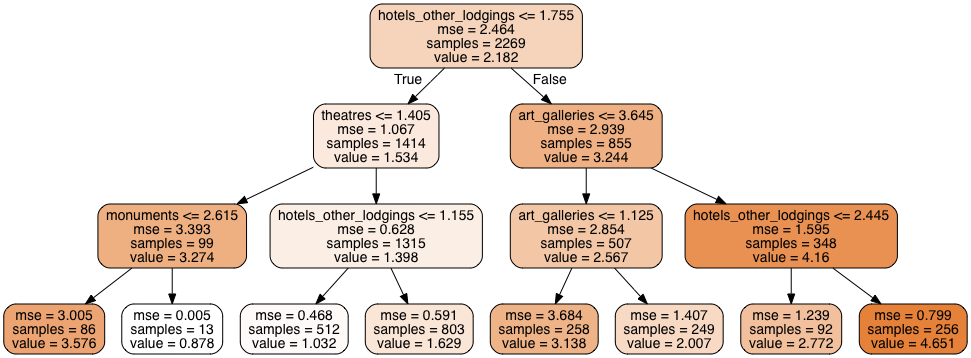

In [135]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
firstEst = regr.estimators_[0]
export_graphviz(firstEst,out_file=dot_data,
                feature_names=X.columns,
                filled=True,
                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [132]:
get_code(regr.estimators_[0], X.columns)

if ( hotels_other_lodgings <= 1.7549999952316284 ) {
if ( theatres <= 1.4049999713897705 ) {
if ( monuments <= 2.6149998903274536 ) {
return [[3.57608392]]
} else {
return [[0.87777778]]
}
} else {
if ( hotels_other_lodgings <= 1.1549999713897705 ) {
return [[1.03153652]]
} else {
return [[1.62860207]]
}
}
} else {
if ( art_galleries <= 3.6450001001358032 ) {
if ( art_galleries <= 1.125 ) {
return [[3.13835937]]
} else {
return [[2.00668367]]
}
} else {
if ( hotels_other_lodgings <= 2.4450000524520874 ) {
return [[2.77186667]]
} else {
return [[4.65099057]]
}
}
}


Question 12: What is the predicted rating for the path shown on quanthub.com?

### Predicted rating for the path shown on quanthub.com: **2.57**

**Task:** Create a sparse matrix with Location (e.g. resorts, beauty_spas, swimming_pools, etc.) on the rows and UserID on the columns with ratings as the values (fill any missing ratings for users with 0)

In [145]:
#transposing the dataframe
review_ratings_processed.set_index('user_id', inplace=True, drop=True)
review_ratings_processed_transpose = review_ratings_processed.T
review_ratings_processed_transpose.head()

user_id,User 777,User 5278,User 2374,User 943,User 4082,User 574,User 2343,User 1131,User 110,User 4910,...,User 1430,User 280,User 994,User 995,User 1063,User 2739,User 344,User 3066,User 4944,User 4857
churches,1.90,1.37,0.75,1.22,1.12,0.90,0.74,0.61,1.25,1.08,...,0.87,2.33,0.54,0.54,1.45,2.58,1.28,2.17,0.92,2.11
resorts,1.93,1.59,0.79,5.00,1.15,0.93,2.53,1.54,1.27,1.31,...,0.89,2.27,0.58,0.58,1.83,2.60,2.42,2.16,5.00,2.63
beaches,1.95,1.42,2.03,1.28,5.00,1.67,2.73,1.55,1.32,2.63,...,2.89,5.00,5.00,5.00,1.83,2.37,2.42,2.17,5.00,2.62
parks,5.00,1.81,2.88,5.00,3.27,2.22,5.00,1.81,1.33,2.63,...,5.00,1.88,1.28,1.28,1.85,1.23,2.63,5.00,4.13,2.64
theatres,2.02,1.80,5.00,5.00,5.00,3.07,5.00,2.02,4.09,2.75,...,5.00,2.32,1.25,1.25,3.18,1.44,2.64,3.07,4.14,3.26


In [147]:
#original Dataframe
review_ratings_processed.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
user_id,,,,,,,,,,,,,,,,,,,,,
User 777,1.90,1.93,1.95,5.00,2.02,2.00,2.01,2.00,2.01,2.11,...,1.99,1.62,1.41,1.40,1.41,1.44,0.58,0.99,1.89,1.89
User 5278,1.37,1.59,1.42,1.81,1.80,1.79,1.81,2.65,2.63,2.63,...,5.00,5.00,0.52,0.50,0.51,0.63,1.43,1.51,1.36,1.35
User 2374,0.75,0.79,2.03,2.88,5.00,5.00,1.64,1.59,1.56,1.55,...,0.78,0.77,0.78,0.79,1.10,0.73,0.70,0.70,0.70,0.73
User 943,1.22,5.00,1.28,5.00,5.00,2.83,2.58,1.72,5.00,4.94,...,0.96,1.16,0.58,0.58,0.59,0.71,1.27,5.00,1.26,1.21
User 4082,1.12,1.15,5.00,3.27,5.00,5.00,5.00,1.99,1.79,2.58,...,1.76,1.78,0.51,0.00,0.00,0.00,0.50,1.09,1.08,1.09


In [150]:
import scipy
sparseMatrix = scipy.sparse.csr_matrix(review_ratings_processed_transpose.values)

In [151]:
sparseMatrix

<24x4456 sparse matrix of type '<class 'numpy.float64'>'
	with 102542 stored elements in Compressed Sparse Row format>

In [230]:
denseSM = sparseMatrix.todense()
denseSM

matrix([[1.9 , 1.37, 0.75, ..., 2.17, 0.92, 2.11],
        [1.93, 1.59, 0.79, ..., 2.16, 5.  , 2.63],
        [1.95, 1.42, 2.03, ..., 2.17, 5.  , 2.62],
        ...,
        [0.99, 1.51, 0.7 , ..., 3.06, 0.87, 0.91],
        [1.89, 1.36, 0.7 , ..., 1.14, 0.88, 1.19],
        [1.89, 1.35, 0.73, ..., 1.66, 0.9 , 1.62]])

**Task:** Apply a brute-force K-Nearest Neighbors algorithm to the matrix with a cosine metric 

In [202]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(algorithm='brute', n_neighbors=6, metric='cosine')
neigh.fit(sparseMatrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=None, n_neighbors=6, p=2, radius=1.0)

Question 13: Which categories are included in the top 5 nearest neighbors to **cafes**?

In [203]:
cols = list(review_ratings_processed_transpose.index.values)

In [204]:
cols.index('cafes')

20

In [205]:
denseSM[20]

matrix([[0.58, 1.43, 0.7 , ..., 0.71, 0.88, 0.89]])

In [220]:
review_ratings_processed_transpose.iloc[20:21,:]

user_id,User 777,User 5278,User 2374,User 943,User 4082,User 574,User 2343,User 1131,User 110,User 4910,...,User 1430,User 280,User 994,User 995,User 1063,User 2739,User 344,User 3066,User 4944,User 4857
cafes,0.58,1.43,0.7,1.27,0.5,0.91,0.64,0.5,0.71,0.0,...,0.77,0.77,1.44,3.41,1.04,5.0,0.85,0.71,0.88,0.89


In [228]:
Knn = neigh.kneighbors(denseSM[20])
Knn[1][0], Knn[0][0]

(array([20,  0, 22, 21, 23,  1]),
 array([2.99760217e-15, 2.66088776e-01, 2.94090061e-01, 2.96480699e-01,
        2.96930865e-01, 3.49730026e-01]))

In [227]:
for x in list(Knn[1][0]):
    print(review_ratings_processed_transpose.iloc[x:x+1,0:0].index[0])

cafes
churches
monuments
view_points
gardens
resorts


**Top 5 Nearest Neighbors to cafes are:**
    1. churches
    2. monuments
    3. view_points
    4. gardens
    5. resorts